In [155]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [156]:
data = pd.read_csv('mnist_data.csv')
data.head()
# consists of label column and columns for each pixel in the image

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [157]:
data = np.array(data)
m, n = data.shape # rows (number of images) and columns (number of features + 1, because of the label column)

# split up data into training and testing
np.random.shuffle(data)

data_dev = data[0:1000].T  # 1000 images for testing
Y_dev = data_dev[0]
X_dev = data_dev[1:n] / 255.  # between 0 and 1. Min-max normalization

data_train = data[1000:m].T
Y_train = data_train[0]  # because of transposition, labels are now in the first row
X_train = data_train[1:n] / 255.

In [158]:
Y_train  # check that Y is an array of integers 0-9

array([4, 6, 5, ..., 9, 7, 7], dtype=int64)

In [159]:
# Better initial parameters can lead to higher accuracy
def init_parameters():
    W1 = np.random.rand(10, 784) - 0.5  # between -0.5 and 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [ ]:
# Activation functions
def ReLU(Z):  # for 1st layer
    return np.maximum(0, Z) # element-wise operation on Z

def softmax(Z):  # for 2nd layer
    e_Z = np.exp(Z - np.max(Z))  # subtract max for numerical stability
    # Makes it scalar, but it's fine for a large dataset
    return e_Z / e_Z.sum(axis=0)

def deriv_ReLU(Z):
    return Z > 0  # if Z is positive, returns 1, 0 otherwise

In [161]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1  # since W1 and x are 2D arrays, dot is matrix multiplication
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)

    return Z1, A1, Z2, A2

In [ ]:
# Y is 0-9, so max+1 is 10 - how many classes we need
# for each row, go to the column specified by Y (0-9) and set it to 1
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max()+1))  # m rows, 10 columns
    one_hot_Y[np.arange(Y.size), Y] = 1  # pair each row number 0 to m with the corresponding label
    return one_hot_Y.T  # each column is an example

In [ ]:
# m is size of Y - how many examples there are
def back_prop(Z1, A1, A2, W2, X, one_hot_Y, m):
    dZ2 = A2 - one_hot_Y  # accounts for derivative of softmax
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2)  # makes it scalar, but it's fine for large datasets

    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1)

    return dW1, db1, dW2, db2

In [164]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha*dW1
    b1 = b1 - alpha*db1

    W2 = W2 - alpha*dW2
    b2 = b2 - alpha*db2

    return W1, b1, W2, b2


In [165]:
def get_predictions(A2):
    return np.argmax(A2, 0)  # chooses the digit with the highest probability

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

In [166]:
# alpha is a hyperparameter set by the programmer
def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_parameters()
    one_hot_Y = one_hot(Y)
    m = Y.size
    
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, A2, W2, X, one_hot_Y, m)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        if i%100 == 0:
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
        
    return W1, b1, W2, b2

In [167]:
# train the model
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 501, 0.1)

Iteration:  0
Accuracy:  0.13170731707317074
Iteration:  100
Accuracy:  0.6161707317073171
Iteration:  200
Accuracy:  0.7700487804878049
Iteration:  300
Accuracy:  0.8194634146341463
Iteration:  400
Accuracy:  0.8420975609756097
Iteration:  500
Accuracy:  0.8558536585365853


In [168]:
# make predictions for the whole dataset based on the weights and biases
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    return get_predictions(A2)

# visualize one of the digits
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [4]
Label:  4


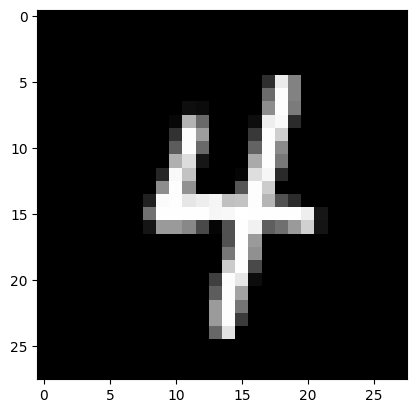

Prediction:  [6]
Label:  6


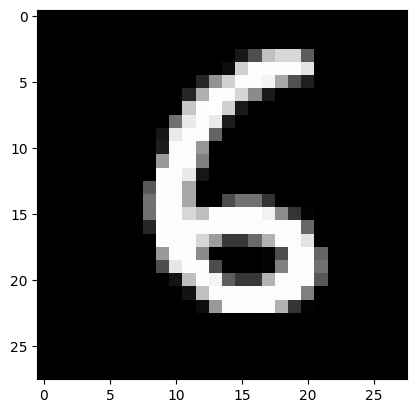

Prediction:  [5]
Label:  5


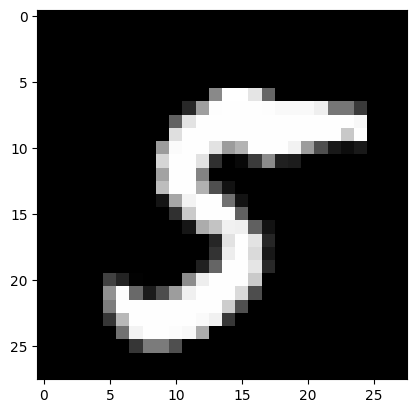

Prediction:  [3]
Label:  3


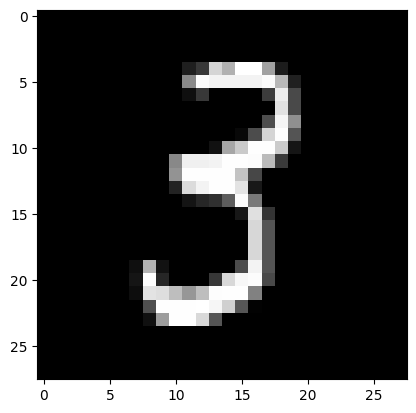

In [169]:
# test several digits
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [170]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

0.849